In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [55]:
data_frame_df= pd.read_csv("Data_Marketing_Customer_Analysis_Round3 (3).csv")
data_frame_df 

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


# check if there are highly correlated features and drop them if there are any.

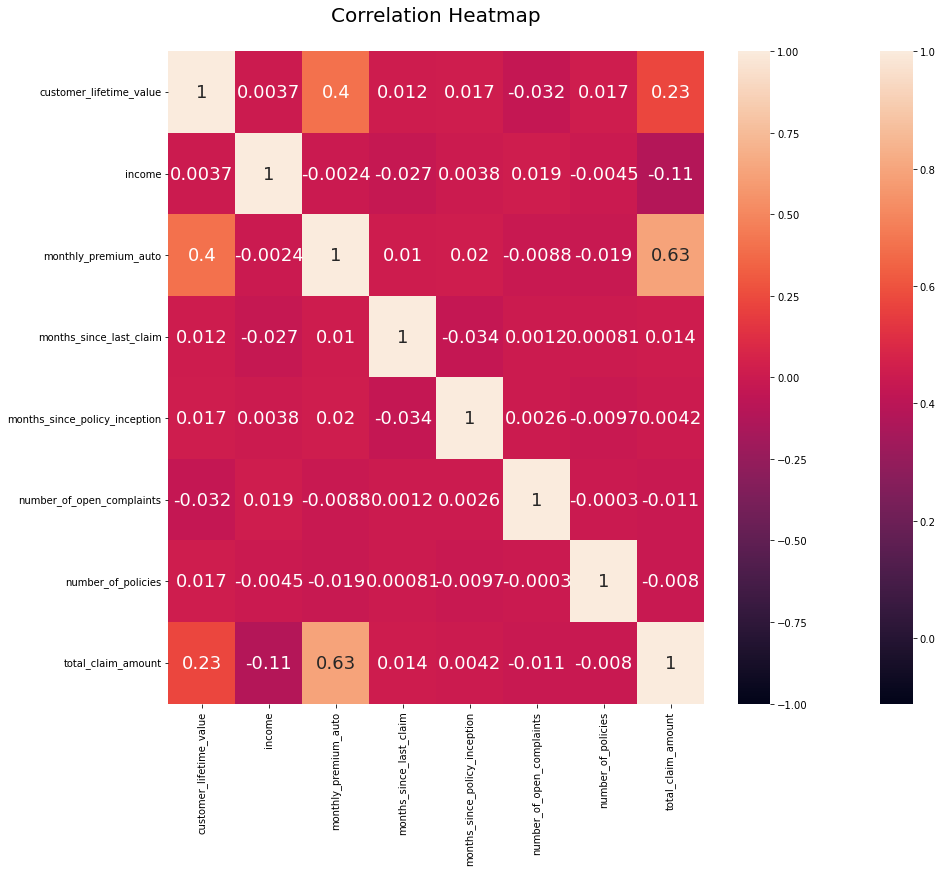

In [56]:
###-Plot the Correlation Heatmap.
plt.figure(figsize=(15,12)) ### FIGURE SIZE

heatmap=sns.heatmap(data_frame_df.corr())
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=30)

heatmap = sns.heatmap(data_frame_df.corr(),annot_kws={"size":18}, vmin=-1, vmax=1, annot= True) ## annot para la letra, kw=tamano y True para existir o no


In [57]:

data_frame_df.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.003732,0.404235,0.011912,0.017055,-0.032371,0.016789,0.232849
income,0.003732,1.000000,-0.002431,-0.026564,0.003846,0.018903,-0.004461,-0.111221
monthly_premium_auto,0.404235,-0.002431,1.000000,0.010036,0.019696,-0.008811,-0.018805,0.630149
months_since_last_claim,0.011912,-0.026564,0.010036,1.000000,-0.034086,0.001204,0.000814,0.013874
months_since_policy_inception,0.017055,0.003846,0.019696,-0.034086,1.000000,0.002554,-0.009719,0.004186
number_of_open_complaints,-0.032371,0.018903,-0.008811,0.001204,0.002554,1.000000,-0.000303,-0.010668
number_of_policies,0.016789,-0.004461,-0.018805,0.000814,-0.009719,-0.000303,1.000000,-0.008019
total_claim_amount,0.232849,-0.111221,0.630149,0.013874,0.004186,-0.010668,-0.008019,1.000000


In [58]:
#montly premiun auto and total claim amount = 0.63 which is not enought to be dropp


# One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).

In [59]:
categoricals_df= data_frame_df.select_dtypes(include='object')

In [60]:
categoricals_df.head()

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize


In [61]:
categoricals_df.columns

Index(['region', 'response', 'coverage', 'education', 'effective_to_date',
       'month', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [62]:
categoricals_df["region"].unique()

array(['central', 'west region', 'east', 'north west'], dtype=object)

In [63]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
categoricals_df["region"]= label_encoder.fit_transform(categoricals_df["region"])

label_encoder = preprocessing.LabelEncoder()
categoricals_df["response"]= label_encoder.fit_transform(categoricals_df["response"])

label_encoder = preprocessing.LabelEncoder()
categoricals_df["coverage"]= label_encoder.fit_transform(categoricals_df["coverage"])

label_encoder = preprocessing.LabelEncoder()
categoricals_df["education"]= label_encoder.fit_transform(categoricals_df["education"])

label_encoder = preprocessing.LabelEncoder()
categoricals_df["month"]= label_encoder.fit_transform(categoricals_df["month"])

label_encoder = preprocessing.LabelEncoder()
categoricals_df["employment_status"]= label_encoder.fit_transform(categoricals_df["employment_status"])

label_encoder = preprocessing.LabelEncoder()
categoricals_df["gender"]= label_encoder.fit_transform(categoricals_df["gender"])

label_encoder = preprocessing.LabelEncoder()
categoricals_df["location_code"]= label_encoder.fit_transform(categoricals_df["location_code"])

label_encoder = preprocessing.LabelEncoder()
categoricals_df["marital_status"]= label_encoder.fit_transform(categoricals_df["marital_status"])

label_encoder = preprocessing.LabelEncoder()
categoricals_df["policy_type"]= label_encoder.fit_transform(categoricals_df["policy_type"])

label_encoder = preprocessing.LabelEncoder()
categoricals_df["policy"]= label_encoder.fit_transform(categoricals_df["policy"])

label_encoder = preprocessing.LabelEncoder()
categoricals_df["renew_offer_type"]= label_encoder.fit_transform(categoricals_df["renew_offer_type"])

label_encoder = preprocessing.LabelEncoder()
categoricals_df["sales_channel"]= label_encoder.fit_transform(categoricals_df["sales_channel"])

label_encoder = preprocessing.LabelEncoder()
categoricals_df["vehicle_class"]= label_encoder.fit_transform(categoricals_df["vehicle_class"])

label_encoder = preprocessing.LabelEncoder()
categoricals_df["vehicle_size"]= label_encoder.fit_transform(categoricals_df["vehicle_size"])



In [64]:
#igual que las formulas anterios pero en funcion
def categoricals_encoding(x):
    categoricals_df[x] = label_encoder.fit_transform(categoricals_df[x])
    return categoricals_df

In [65]:
categoricals_encoding ("region") # llama a la funcion


,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,0,0,0,1,2/18/11,0,1,1,1,1,0,2,2,0,0,1
1,3,0,0,1,1/18/11,1,4,0,1,2,1,5,3,2,0,1
2,1,0,0,0,2/10/11,0,1,1,1,2,1,5,2,2,4,1
3,2,1,1,1,1/11/11,1,1,1,1,2,0,2,1,1,0,1
4,2,0,2,0,1/17/11,1,2,0,1,1,1,4,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,2,0,1/19/11,1,4,0,1,1,1,3,2,3,1,1
10685,2,0,0,1,1/6/11,1,1,0,2,1,1,5,1,1,0,1
10686,0,0,1,0,2/6/11,0,1,0,0,1,0,2,0,3,2,1
10687,3,0,2,1,2/13/11,0,1,0,2,0,1,3,0,1,4,1


# for the first iteration, we will focus on the numericals data (numericals data frame) as our data source.

In [66]:
numericals= data_frame_df.select_dtypes(include='int')

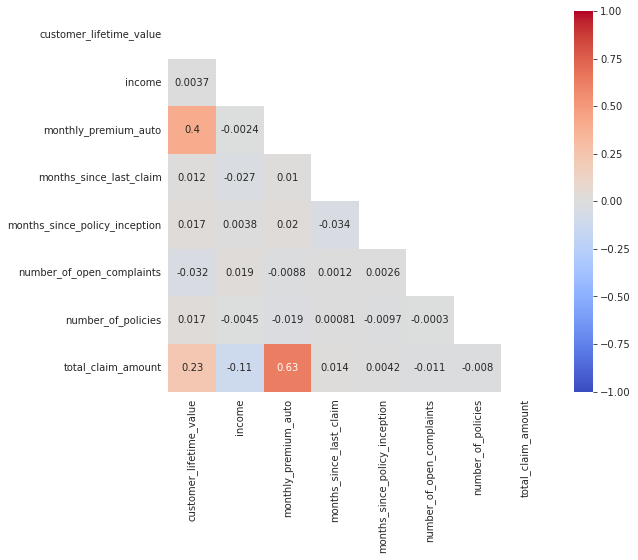

In [67]:
corr = numericals.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [68]:
numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


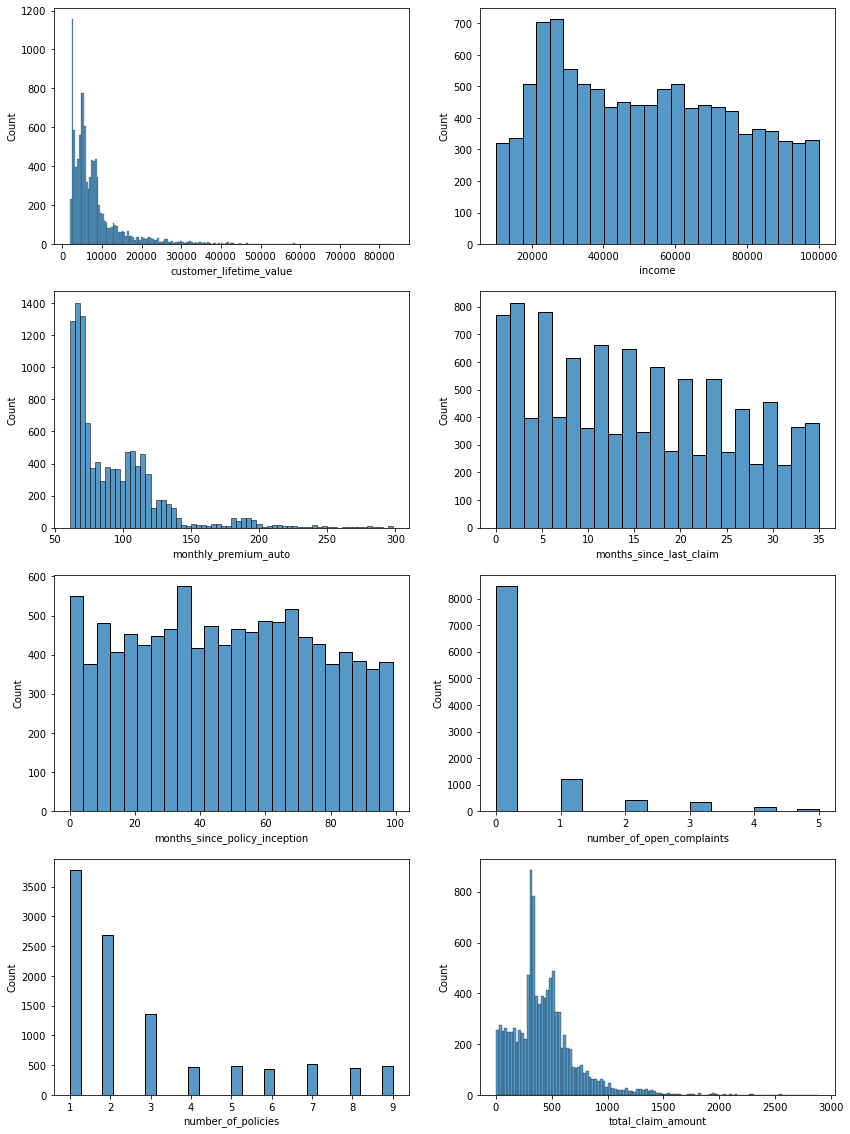

In [69]:
plt.subplots(figsize=(14, 20))
count=1
for i in numericals:
    plt.subplot(4,2,count)
    sns.histplot(numericals[i])
    count+=1
plt.show()

In [71]:
numericals.monthly_premium_auto.mean()

93.19019552811301

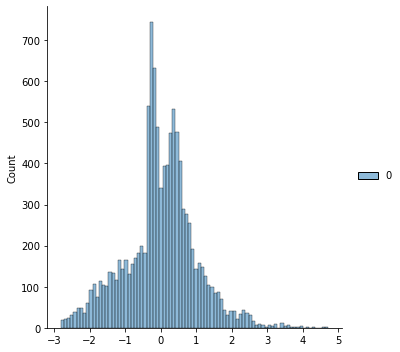

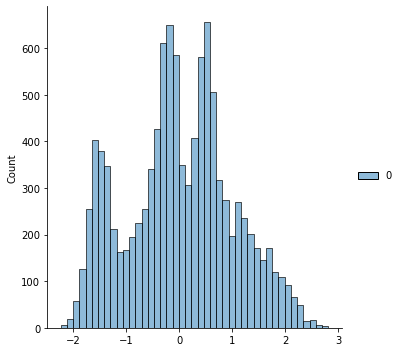

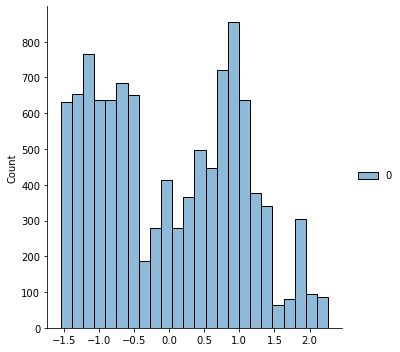

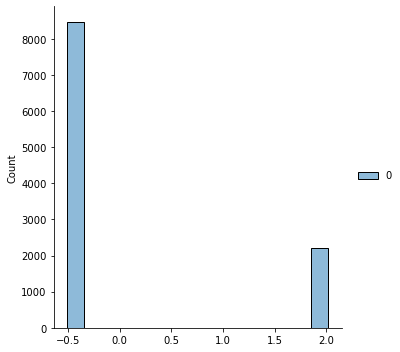

In [50]:
pt = PowerTransformer()

med_home_val_transformed=pt.fit_transform(numericals['customer_lifetime_value'].to_numpy().reshape(-1,1))
sns.displot(med_home_val_transformed)
med_home_val_transformed=pt.fit_transform(numericals['monthly_premium_auto'].to_numpy().reshape(-1,1))
sns.displot(med_home_val_transformed)
med_home_val_transformed=pt.fit_transform(numericals['number_of_open_complaints'].to_numpy().reshape(-1,1))
sns.displot(med_home_val_transformed)



In [18]:
X=numericals.drop('total_claim_amount', axis=1)
y=numericals.total_claim_amount

In [19]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123) # paso info

In [20]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [21]:
X_train.shape

(7482, 7)

In [22]:
X_test_scaled=std_scaler.transform(X_test)

In [23]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.11021627 -1.27291744 -0.67143823 ...  1.36516733 -0.42500069
  -0.40381143]
 [-0.42794064  0.74729478 -0.72925469 ...  1.68786198 -0.42500069
   0.84759702]
 [-0.5223013   0.26592193  0.48489091 ...  0.50464827 -0.42500069
  -0.82094758]
 ...
 [-0.81132612 -1.17224873 -0.90270406 ... -1.39566466 -0.42500069
  -0.82094758]
 [ 2.25575772  0.98537142 -0.78707115 ... -1.61079442 -0.42500069
  -0.40381143]
 [ 1.18923585  0.68583346 -0.55580532 ...  0.21780858  1.78399907
  -0.40381143]]
--------
[[-0.40967729  1.58428551 -0.61362178 ...  1.54444214 -0.42500069
   2.51614162]
 [-0.7597249  -0.93947257 -0.64253    ...  0.755633    0.67949919
  -0.82094758]
 [ 0.57248529 -1.23371005 -0.90270406 ...  0.39708339 -0.42500069
  -0.40381143]
 ...
 [-0.79857077 -1.05867274 -0.58471355 ... -1.18053489 -0.42500069
  -0.82094758]
 [-0.42547654 -0.97370317 -0.81597938 ... -1.61079442  0.67949919
   0.43046087]
 [-0.49881985 -0.95695203  0.71615674 ... -1.00126009 -0.42500069
  -0.82094758]]


In [24]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     742.9
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:44:15   Log-Likelihood:                -51168.
No. Observations:                7482   AIC:                         1.024e+05
Df Residuals:                    7474   BIC:                         1.024e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.0597      2.612    165.770      0.0

In [25]:
# x3 high correlation

In [26]:
predictions_test

array([260.52304948, 353.76752657, 297.68091412, ..., 367.57334203,
       317.67903438, 608.06079373])

In [27]:
#display adjusted R-squared
print(model.rsquared_adj)


0.40976457437034053


In [28]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [29]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
6608,7271,20545,70,23,86,0,2
5697,5079,70474,68,6,95,0,5
10524,4428,58577,110,6,62,0,1
397,22332,49078,97,10,3,0,2
6324,2430,26182,70,29,30,0,1
...,...,...,...,...,...,...,...
9785,3086,73938,76,34,48,0,1
7763,5658,78834,72,14,20,2,8
5218,2434,23033,62,5,9,0,1
1346,23594,76358,66,25,3,0,2


In [30]:
model.coef_

array([ -6.5986299 , -33.18126217, 187.80190938,   1.90598135,
        -0.91148552,   1.71705592,  -2.32015745])

In [31]:
model.intercept_


433.0597433841219

In [32]:
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

In [33]:
y_pred

array([260.52304948, 353.76752657, 297.68091412, ..., 367.57334203,
       317.67903438, 608.06079373])

In [34]:
y_test

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
3488     404
1667     554
1516     350
10215     27
2931     320
Name: total_claim_amount, Length: 3207, dtype: int64

In [35]:
 #np.array(np.array(numericals).reshape(-1,7)).shape

In [36]:
## new record 
new_data=[5079,70474,68,6,95,0,5] # cpy paste data from x train 
new_data_scaled=std_scaler.transform(np.array(new_data).reshape(-1,7))

C:\Users\Stephan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [37]:
model.predict(new_data_scaled)

array([268.17631433])

In [38]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

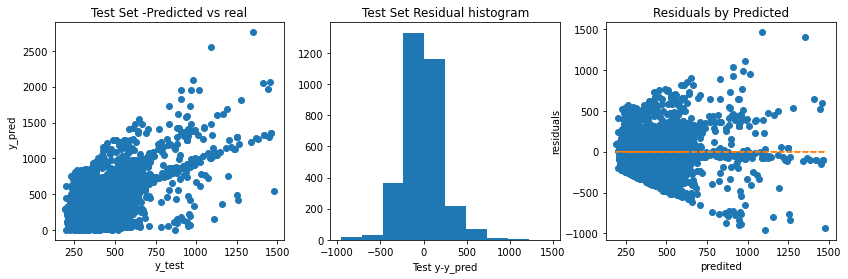

In [39]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

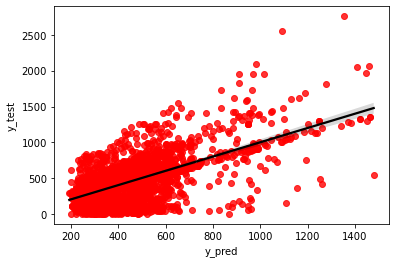

In [40]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

#### Model Validation
- Model Evaluation:
  - MSE.
  - RMSE.
  - MAE.
  - R2.
  - Adjusted R2.
- Feature Importance.

In [41]:
print(mse(y_test,y_pred)) #mse
print(mae(y_test,y_pred)) #mae

49433.00247202497
152.0299230278208


In [42]:
mse(y_train,y_pred_train) 

51007.93558508785

In [43]:
R2=r2_score(y_test,y_pred) #R2
R2

0.40738490678489503

In [49]:
# - Adjusted R2.
#Feature Importance.

Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.40608815603387727

In [48]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_train, y_pred_train, squared=False)
rms

225.84936481001634